# Initial Data Load and Overview

## Imports

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Data Load

In [2]:
work_dir = os.getcwd()
data_dir = os.path.join(work_dir, '../data')

In [3]:
data = pd.read_excel(os.path.join(data_dir, 'external/antibody_info.xlsx'), header=1)
display(data)

,Antibody Name,Epitope Group,source,D614G,BA.1,BA.2,BA.2.75,BA.5,BQ.1.1,XBB,Heavy chain V gene,Heavy chain J gene,Light chain V gene,Light chain J gene,Heavy chain AA,Light chain AA
0,BD-196,C,WT convalescents,1.93,>10,>10,>10,>10,>10,>10,IGHV1-3,IGHJ6,IGKV2-58,IGKJ1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNTYLNWFQQRPG...
1,BD-218,A,WT convalescents,0.0104,0.00849,0.00937,0.0116,5.26,>10,>10,IGHV4-34,IGHJ1,IGKV3-11,IGKJ5,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSDYFWYWIRQPPGKGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
2,BD-236,A,WT convalescents,0.0173,>10,>10,>10,>10,>10,>10,IGHV3-53,IGHJ6,IGKV1-9,IGKJ4,EVQLVESGGGLIQPGGSLRLSCAASGITVSSNYMSWVRQAPGKGLE...,IQLTQSPSSLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKLL...
3,BD-254,C,WT convalescents,0.25,>10,>10,>10,>10,>10,>10,IGHV3-23,IGHJ4,IGLV7-46,IGLJ2,EVQLLESGGGLVQPGGSLRLSCAASGFTLSSYAMSWVRQAPGRGLE...,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...
4,BD-255,B,WT convalescents,0.113,>10,>10,>10,>10,>10,>10,IGHV3-30,IGHJ6,IGKV3-15,IGKJ2,QVQLVESGGGVVQPGRSLRLSCVASGFTFSNYDMHWVRQAPGKGLE...,EIVMTQSPAILSVSPGERATLSCRASQSVTRNLAWYQQKPGQAPRL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,BD55-6726,E2.2,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-58,IGHJ2,IGKV3-24,IGKJ1,QMQLVQSGPEVKRPGTSVKVSCEASGFTFSSSAILWVRQPRGQRLE...,EIVLRQSPATVSLSPGERATLSCRASQSVHNYLAWFQQKPGQAPRL...
3047,BD55-6727,F2,SARS convalescents,0.293,4.37,>10,>10,>10,>10,>10,IGHV3-11,IGHJ1,IGKV1-39,IGKJ2,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMNWIRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISNYLNWYQQKPGKAPKL...
3048,BD55-6728,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV3-64,IGHJ2,IGKV1-39,IGKJ1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRFAMHWVRQAPGKGLE...,DIQMTQSPSSLSASLGDRVTITCRASQTISRYLNWYQQKPGKAPKV...
3049,BD55-6729,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-18,IGHJ6,IGLV3-25,IGLJ2,QVQLVQSGAEVKKPGTSMRVSCKASGYTFSTYGIIWVRQAPGQGLE...,SYELTQPPSVSVSPGQTARITCSGDAVATQFLYWYQQKSGQAPVMV...


## Countplots

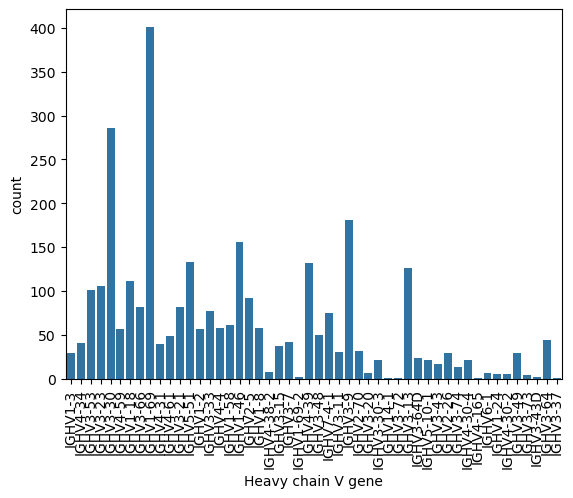

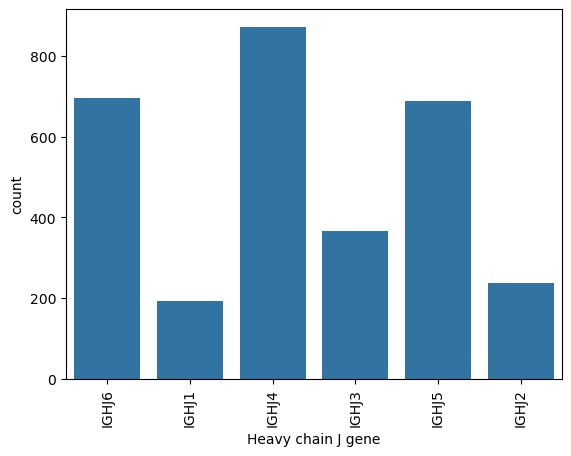

In [4]:
sns.countplot(data=data, x='Heavy chain V gene')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=data, x='Heavy chain J gene')
plt.xticks(rotation=90)
plt.show()

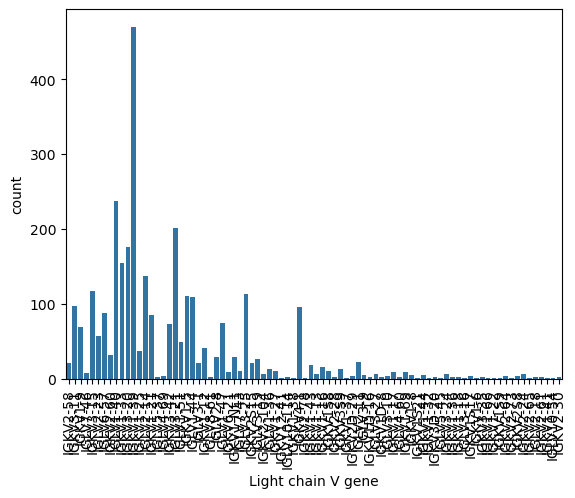

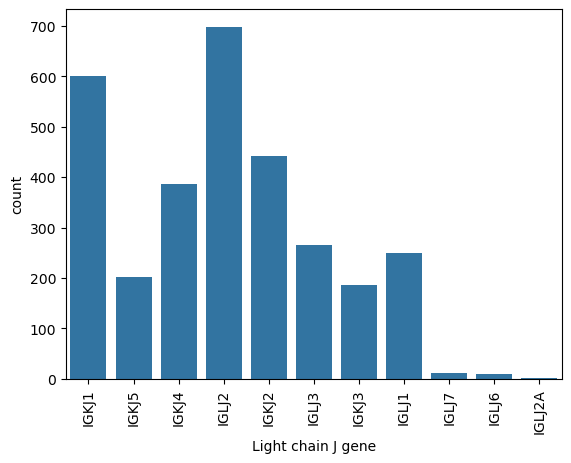

In [5]:
sns.countplot(data=data, x='Light chain V gene')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=data, x='Light chain J gene')
plt.xticks(rotation=90)
plt.show()

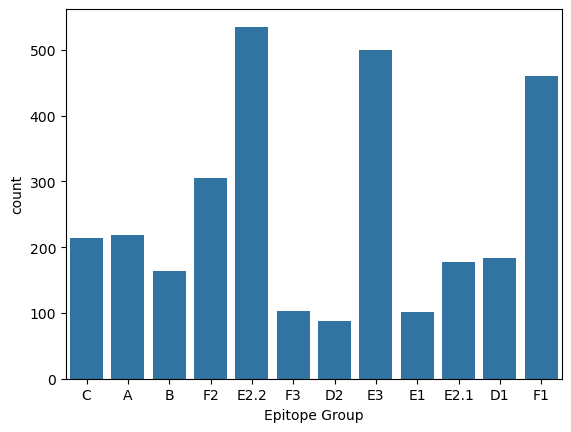

In [6]:
sns.countplot(data=data, x='Epitope Group')
plt.show()

## Simple PCA

Blosum encode full sequences:

In [9]:
from Bio.Align import substitution_matrices
from sklearn.decomposition import PCA


matrix = substitution_matrices.load("BLOSUM62")
def blosum_encode(seq):
    encoding = []
    for pos, res in enumerate(list(seq)):
        index = matrix.alphabet.index(res)
        v = matrix[index, :]
        encoding.append(v)
    encoding = np.concatenate(encoding)
    return encoding

def blosum_encode_seqs(seq_list):
    seq_encodings = []
    max_l = max([len(s) for s in seq_list])
    for seq in seq_list:
        pad_len = (max_l - len(seq)) * len(matrix.alphabet)
        seq_enc = np.concat([blosum_encode(seq), np.zeros(pad_len)])
        seq_encodings.append(seq_enc)
    return seq_encodings

def plot_pca(seqs, labels, output_filename=None, **args):
    pca = PCA(n_components=2)
    encodings = blosum_encode_seqs(seqs)
    coords = pca.fit_transform(encodings)
    for label in np.unique(labels):
        idx = np.where(labels == label)
        plt.scatter(coords[idx, 0], coords[idx, 1], label=label, **args)
    plt.legend()

    if not output_filename:
        plt.show()
    else:
        plt.savefig(output_filename)
    

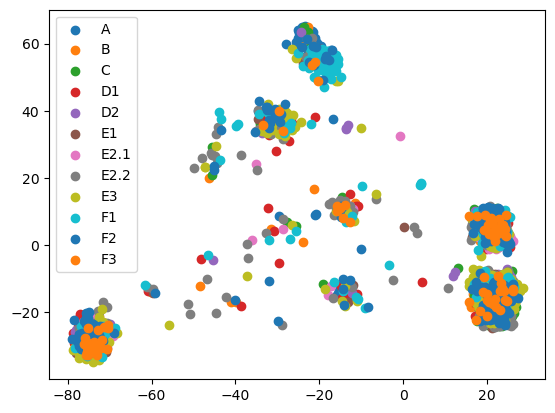

In [10]:
vh_seqs = data['Heavy chain AA'].values
labels = data['Epitope Group'].values

plot_pca(seqs=vh_seqs, labels=labels)

## Partition data into training and validation set

Use MMSEQS2


In [62]:
vh_seqs = data['Heavy chain AA'].values
vl_seqs = data['Light chain AA'].values

In [66]:
data

,Antibody Name,Epitope Group,source,D614G,BA.1,BA.2,BA.2.75,BA.5,BQ.1.1,XBB,Heavy chain V gene,Heavy chain J gene,Light chain V gene,Light chain J gene,Heavy chain AA,Light chain AA
0,BD-196,C,WT convalescents,1.93,>10,>10,>10,>10,>10,>10,IGHV1-3,IGHJ6,IGKV2-58,IGKJ1,QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYAMHWVRQAPGQRLE...,DVVMTQSPLSLPVTLGQPASISCRSSQSLVYSDGNTYLNWFQQRPG...
1,BD-218,A,WT convalescents,0.0104,0.00849,0.00937,0.0116,5.26,>10,>10,IGHV4-34,IGHJ1,IGKV3-11,IGKJ5,QVQLQQWGAGLLKPSETLSLTCAVYGGSFSDYFWYWIRQPPGKGLE...,EIVLTQSPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
2,BD-236,A,WT convalescents,0.0173,>10,>10,>10,>10,>10,>10,IGHV3-53,IGHJ6,IGKV1-9,IGKJ4,EVQLVESGGGLIQPGGSLRLSCAASGITVSSNYMSWVRQAPGKGLE...,IQLTQSPSSLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKLL...
3,BD-254,C,WT convalescents,0.25,>10,>10,>10,>10,>10,>10,IGHV3-23,IGHJ4,IGLV7-46,IGLJ2,EVQLLESGGGLVQPGGSLRLSCAASGFTLSSYAMSWVRQAPGRGLE...,QAVVTQEPSLTVSPGGTVTLTCGSSTGAVTSGHYPYWFQQKPGQAP...
4,BD-255,B,WT convalescents,0.113,>10,>10,>10,>10,>10,>10,IGHV3-30,IGHJ6,IGKV3-15,IGKJ2,QVQLVESGGGVVQPGRSLRLSCVASGFTFSNYDMHWVRQAPGKGLE...,EIVMTQSPAILSVSPGERATLSCRASQSVTRNLAWYQQKPGQAPRL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,BD55-6726,E2.2,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-58,IGHJ2,IGKV3-24,IGKJ1,QMQLVQSGPEVKRPGTSVKVSCEASGFTFSSSAILWVRQPRGQRLE...,EIVLRQSPATVSLSPGERATLSCRASQSVHNYLAWFQQKPGQAPRL...
3047,BD55-6727,F2,SARS convalescents,0.293,4.37,>10,>10,>10,>10,>10,IGHV3-11,IGHJ1,IGKV1-39,IGKJ2,QVQLVESGGGLVKPGGSLRLSCAASGFTFSDYYMNWIRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISNYLNWYQQKPGKAPKL...
3048,BD55-6728,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV3-64,IGHJ2,IGKV1-39,IGKJ1,EVQLVESGGGLVQPGGSLRLSCAASGFTFSRFAMHWVRQAPGKGLE...,DIQMTQSPSSLSASLGDRVTITCRASQTISRYLNWYQQKPGKAPKV...
3049,BD55-6729,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,IGHV1-18,IGHJ6,IGLV3-25,IGLJ2,QVQLVQSGAEVKKPGTSMRVSCKASGYTFSTYGIIWVRQAPGQGLE...,SYELTQPPSVSVSPGQTARITCSGDAVATQFLYWYQQKSGQAPVMV...


In [75]:
with open(os.path.join(data_dir, 'raw', 'heavy_chain.fasta'), 'w') as f:
    for index, row in data.iterrows():
        f.write(f'>{row['Antibody  Name']}\n{row['Heavy chain AA']}\n')

In [76]:
with open(os.path.join(data_dir, 'raw', 'light_chain.fasta'), 'w') as f:
    for index, row in data.iterrows():
        f.write(f'>{row['Antibody  Name']}\n{row['Light chain AA']}\n')

Use MMSeqs2 to cluster sequences based on sequence identity:

<code>
mmseqs easy-cluster data/raw/heavy_chain.fasta data/interim/heavy_chain_clus90 tmp --min-seq-id 0.9 -c 0 --cov-mode 0

mmseqs easy-cluster data/raw/light_chain.fasta data/interim/light_chain_clus90 tmp --min-seq-id 0.9 -c 0 --cov-mode 0
</code>

Would use subprocess to run from notebook (see below) but will not work properly...

In [81]:
# import subprocess
# cmd = ['mmseqs', 
#        'easy-cluster', 
#        os.path.join(data_dir, 'raw', 'heavy_chain.fasta'), 
#        os.path.join(data_dir, 'interrim', 'heavy_chain_clust_90'), 
#        'tmp', 
#        '--perc-ident', '0.9',
#        '-c', '0']
# subprocess.run(cmd, shell=True, check=True)

In [13]:
clus_vh = pd.read_table(os.path.join(data_dir, 'interim', 'heavy_chain_clus90_cluster.tsv'), header=None)
clus_map = {name: i for i, name in enumerate(clus_vh[0].unique())}
clus_list = [clus_map[name] for name in clus_vh[0]]
print('Number of clusters:', len(clus_map))
data['clus_vh'] = clus_list

Number of clusters: 2572


In [14]:
clus_vl = pd.read_table(os.path.join(data_dir, 'interim', 'light_chain_clus90_cluster.tsv'), header=None)
clus_map = {name: i for i, name in enumerate(clus_vl[0].unique())}
clus_list = [clus_map[name] for name in clus_vl[0]]
print('Number of clusters:', len(clus_map))
data['clus_vl'] = clus_list

Number of clusters: 916


In [15]:
from sklearn.model_selection import train_test_split


def initialize_graph(data):
    G = nx.Graph()
    cluster_dict_vh = dict()
    cluster_dict_vl = dict()

    for idx, row in data.iterrows():
        G.add_node(idx)
        cluster_dict_vh.setdefault(row['clus_vh'], []).append(idx)
        cluster_dict_vl.setdefault(row['clus_vl'], []).append(idx)
    
    return G, cluster_dict_vh, cluster_dict_vl


def add_edges(G, cluster_dict):
    for clus, idxs in cluster_dict.items():
        for i in range(len(idxs)-1):
            for j in range(i+1, len(idxs)):
                name1 = idxs[i]
                name2 = idxs[j]
                G.add_edge(name1, name2)

    return G

def create_dataset_map(train_components, test_components):
    dataset_map = dict()
    for components, label in zip([train_components, test_components], ['train', 'eval']):
        for component in components:
            for idx in component:
                dataset_map[idx] = label
    return dataset_map

def partition_data(data, **args):
    G, cluster_dict_vh, cluster_dict_vl = initialize_graph(data)
    G = add_edges(G, cluster_dict_vh)
    G = add_edges(G, cluster_dict_vl)

    connected_components = list(nx.connected_components(G))

    train_components, test_components = train_test_split(connected_components, **args)

    dataset_map = create_dataset_map(train_components, test_components)

    data['dataset'] = data.index.map(dataset_map)

    return data[data['dataset'] == 'train'], data[data['dataset'] == 'eval']

In [34]:
train_data, test_data = partition_data(data, test_size=0.4)
print(len(train_data))
print(len(test_data))


1654
1397


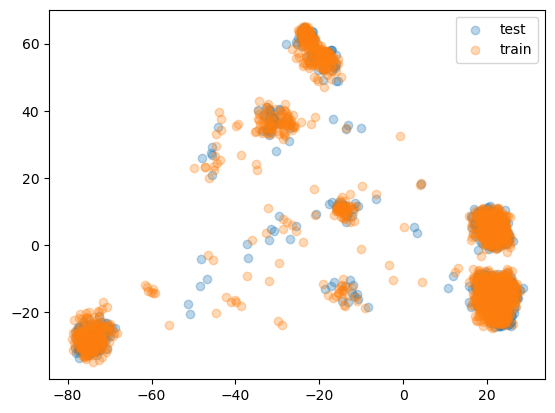

In [ ]:
seqs = np.concatenate([train_data['Heavy chain AA'].values, test_data['Heavy chain AA'].values])
labels = np.concatenate([np.repeat('train', len(train_data)), np.repeat('test', len(test_data))])
plot_pca(seqs, labels, alpha=0.3)

In [67]:
dist_mat = np.zeros((len(train_data), len(train_data)))
for i in tqdm(range(len(train_data)-1)):
    seq1 = train_data.iloc[i]['Heavy chain AA']
    for j in range(i+1, len(train_data)):
        seq2 = train_data.iloc[j]['Heavy chain AA']
        dist = distance(seq1, seq2)
        dist_mat[i, j] = dist

  0%|          | 0/1653 [00:00<?, ?it/s]

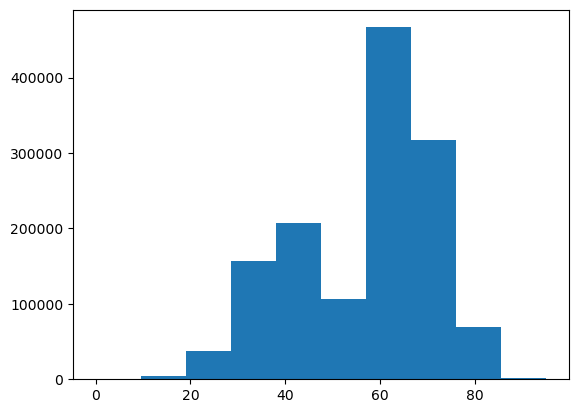

In [72]:
plt.hist(dist_mat[np.triu_indices(dist_mat.shape[0], k=1)])
plt.show()

In [69]:
dist_mat_flat = []
for i in tqdm(range(len(train_data)-1)):
    seq1 = train_data.iloc[i]['Heavy chain AA']
    for j in range(len(test_data)):
        seq2 = test_data.iloc[j]['Heavy chain AA']
        dist = distance(seq1, seq2)
        dist_mat_flat.append(dist)

  0%|          | 0/1653 [00:00<?, ?it/s]

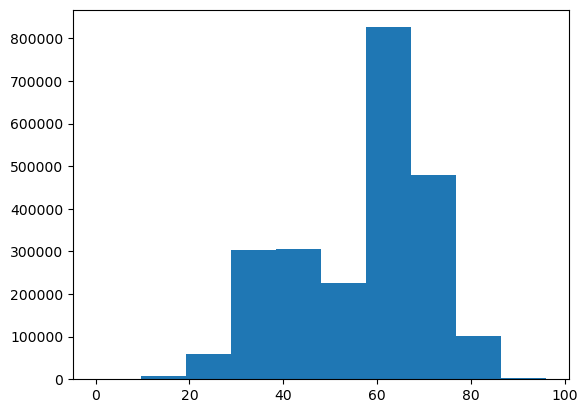

In [71]:
plt.hist(dist_mat_flat)
plt.show()

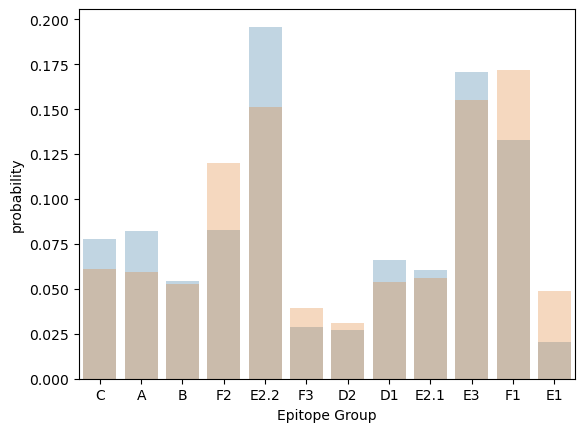

In [73]:
sns.countplot(data=train_data, x='Epitope Group', alpha=0.3, stat='probability')
sns.countplot(data=test_data, x='Epitope Group', alpha=0.3, stat='probability')
plt.show()